# 🔬 Beijing Air Quality
## 📘 Notebook 03 – Initial EDA

| Field         | Description                                        |
|:--------------|:---------------------------------------------------|
| Author:       |	Robert Steven Elliott                            |
| Course:       |	Code Institute – Data Analytics with AI Bootcamp |
| Project Type: |	Capstone                                         |
| Date:         |	December 2025                                    |

## Objectives
This notebook performs the Initial Exploratory Data Analysis (EDA):
- Data Overview Analysis
- Pollutant Distribution Analysis
- Temporal Trend Analysis
- Station Level Analysis
- Correlation and Relationship Analysis
- EDA Summary Documentation

## Inputs
- `data/cleaned/beijing_cleaned.csv`
- Columns include:
    - datetime
    - PM2.5
    - TEMP, DEWP, PRES, RAIN
    - station

## Outputs
- Distribution plots, temporal trend charts, station-level comparisons
- Correlation matrix and scatterplots
- Summary statistics
- Initial insights to inform Feature Engineering and Hypothesis Validation
- Figures saved to figures/eda/

## Additional Comments
- This notebook focuses on exploration, not modelling—no predictive work should be included here.
- Any missing patterns connected to weather, trends, seasonality, or station differences should be noted for later use.
- Season variables (winter/spring/summer/autumn) will be added during Feature Engineering, not EDA.
- PM10, SO₂, NO₂, CO, and O₃ were removed during cleaning; they will not appear in this notebook.

## Citation  
This project uses data from:

**Chen, Song (2017). _Beijing Multi-Site Air Quality_. UCI Machine Learning Repository.**  
DOI: https://doi.org/10.24432/C5RK5G  
Mirrored on Kaggle by Manu Siddhartha (CC BY 4.0 Licence).

---

## Notebook Setup

### Import Required Libraries

We import the necessary Python tools for data cleaning:

- `pathlib` – to handle file paths
- `pandas` – to manipulate tabular data
- `matplotlib` – for plotting
- `numpy` – numeric operations 
- `seaborn` - enhanced data visualisation
- `plotly.express` - interactive plots

In [2]:
from pathlib import Path # for handling file paths
import pandas as pd # for data manipulation
import numpy as np # for numerical operations
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for enhanced data visualization
import plotly.express as px # for interactive plots

setup matplotlib and seaborn themes

In [3]:
plt.style.use("seaborn-v0_8") # Set matplotlib style
sns.set_theme() # Set seaborn theme

### Set Up Project Paths

We define paths for input and output datasets to ensure the notebook is portable and reproducible.

In [4]:
project_root = Path.cwd().parent # Assuming this script is in a subdirectory of the project root
data_path = project_root / "data" # Path to the data directory

input_path = data_path / "cleaned" / "beijing_cleaned.csv" # Output file path

print("Input path :", input_path) # Print input path

Input path : /home/robert/Projects/beijing-air-quality/data/cleaned/beijing_cleaned.csv


### Load Dataset

Load the cleaned dataset created in Notebook 02.

In [5]:
df = pd.read_csv(input_path) # Load the combined data
df.head() # Display the first few rows of the dataframe

,datetime,pm2.5,temp,pres,dewp,rain,wd,wspm,station
0,2013-03-01 00:00:00,4.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,guanyuan
1,2013-03-01 00:00:00,3.0,-2.3,1020.8,-19.7,0.0,E,0.5,changping
2,2013-03-01 00:00:00,6.0,0.1,1021.1,-18.6,0.0,NW,4.4,gucheng
3,2013-03-01 00:00:00,8.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,wanliu
4,2013-03-01 00:00:00,4.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,aotizhongxin


## Basic Structure Overview

In [6]:
df.info() # Display dataframe info
df.shape # Display dataframe shape
df.isna().sum() # Check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   datetime  420768 non-null  object 
 1   pm2.5     420768 non-null  float64
 2   temp      420768 non-null  float64
 3   pres      420768 non-null  float64
 4   dewp      420768 non-null  float64
 5   rain      420768 non-null  float64
 6   wd        420768 non-null  object 
 7   wspm      420768 non-null  float64
 8   station   420768 non-null  object 
dtypes: float64(6), object(3)
memory usage: 28.9+ MB


datetime    0
pm2.5       0
temp        0
pres        0
dewp        0
rain        0
wd          0
wspm        0
station     0
dtype: int64

## Data Overview Analysis


This section provides a high-level understanding of the cleaned Beijing air-quality dataset.
We examine the dataset structure, dimensionality, variable types, and descriptive statistics to understand central tendencies, spread, and dataset completeness.

### Column and dtype overview

In [7]:
df.columns # Display dataframe columns

Index(['datetime', 'pm2.5', 'temp', 'pres', 'dewp', 'rain', 'wd', 'wspm',
       'station'],
      dtype='object')

In [8]:
df.dtypes # Display dataframe data types

datetime     object
pm2.5       float64
temp        float64
pres        float64
dewp        float64
rain        float64
wd           object
wspm        float64
station      object
dtype: object

reconvert datetime and category columns and inspect dtypes

In [9]:
datetime_cols = ['datetime'] # List of datetime columns
object_cols = df.select_dtypes(include=['object']).columns.difference(datetime_cols) # Identify object type columns
df[datetime_cols] = df[datetime_cols].apply(pd.to_datetime) # Convert datetime columns to datetime type
df[object_cols] = df[object_cols].astype('category') # Convert object columns to category type
df.info() # Display updated dataframe info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   datetime  420768 non-null  datetime64[ns]
 1   pm2.5     420768 non-null  float64       
 2   temp      420768 non-null  float64       
 3   pres      420768 non-null  float64       
 4   dewp      420768 non-null  float64       
 5   rain      420768 non-null  float64       
 6   wd        420768 non-null  category      
 7   wspm      420768 non-null  float64       
 8   station   420768 non-null  category      
dtypes: category(2), datetime64[ns](1), float64(6)
memory usage: 23.3 MB


### Descriptive statistics

In [10]:
overview_stats = df.describe().T # Get basic statistical overview
overview_stats["skew"] = df.skew(numeric_only=True) # Calculate skewness
overview_stats["kurtosis"] = df.kurtosis(numeric_only=True) # Calculate kurtosis
overview_stats # Display the overview statistics

,count,mean,min,25%,50%,75%,max,std,skew,kurtosis
datetime,420768,2015-03-01 11:29:59.999999232,2013-03-01 00:00:00,2014-03-01 05:45:00,2015-03-01 11:30:00,2016-02-29 17:15:00,2017-02-28 23:00:00,NaN,NaN,NaN
pm2.5,420768.0,79.836161,2.0,20.0,55.0,111.0,999.0,81.055199,2.027100,6.028731
temp,420768.0,13.531643,-19.9,3.1,14.5,23.3,41.6,11.437786,-0.103396,-1.144292
pres,420768.0,1010.754545,982.4,1002.3,1010.4,1019.0,1042.8,10.474491,0.105462,-0.829574
dewp,420768.0,2.482602,-43.4,-8.9,3.0,15.1,29.1,13.797255,-0.186849,-1.133436
rain,420768.0,0.064416,0.0,0.0,0.0,0.0,72.5,0.820626,30.057526,1346.750490
wspm,420768.0,1.730317,0.0,0.9,1.4,2.2,13.2,1.24698,1.625499,3.680951


## Pollutant Distribution Analysis

This section analyses the distribution of PM2.5 and key meteorological variables to understand general patterns, extreme values, and variable behaviour.

### PM2.5 histogram + KDE

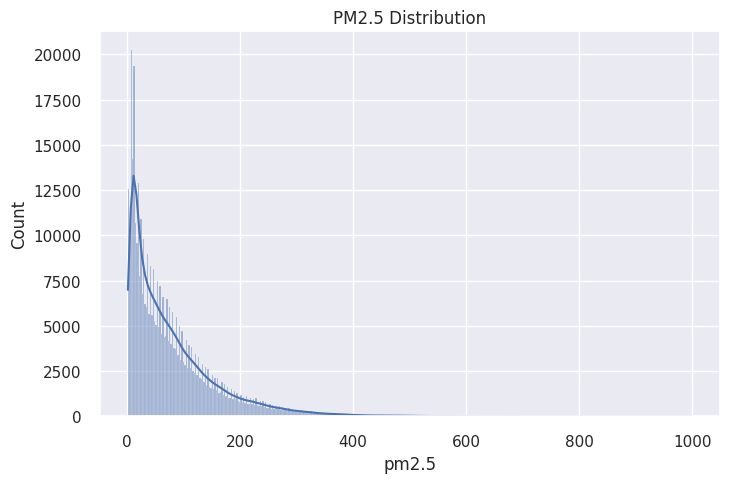

In [12]:
plt.figure(figsize=(8,5))
sns.histplot(df["pm2.5"], kde=True)
plt.title("PM2.5 Distribution")
plt.show()

#### Initial observations

Distribution is heavily right skewed

### PM2.5 boxplot

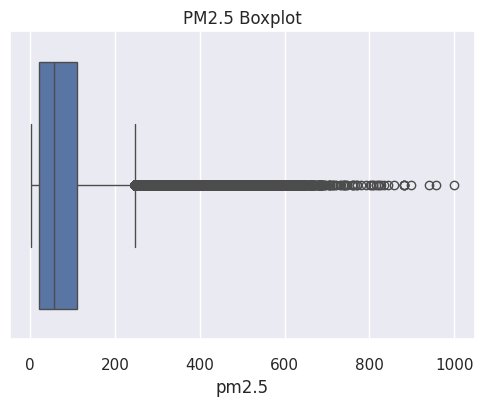

In [14]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df["pm2.5"])
plt.title("PM2.5 Boxplot")
plt.show()

#### Initial Observations

backs the histogram, showing alarge amount of outliers.

### Weather distributions

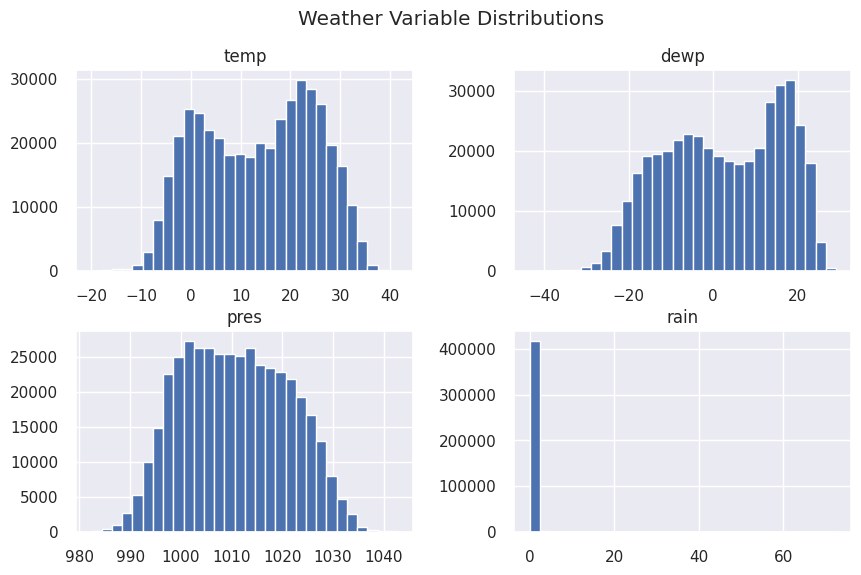

In [15]:
weather_cols = ["temp", "dewp", "pres", "rain"]
df[weather_cols].hist(figsize=(10,6), bins=30)
plt.suptitle("Weather Variable Distributions")
plt.show()

#### Initial Observations

temp and dewp appear to be bimodal while pre shows a slight right skew.
all of the values for rain seem to be in the same bin.